# 2023/24-XAI-LABS
Note that this lab has three levels: basic, regular and advanced.\
Doing the **basic** part earns you a grade of 5.5-6.0.\
Doing the **regular** part earns you a max grade of 8.\
Doing the **advanced** part earns you a max grade of 10.0.

Please return a Jupyter notebook as a submission in Canvas, to make the grading easier for us.

**Group No:** 9

**Student Name**: Wan Barmawi Muhammad Razaq S2819201

**Student Name**: Hakan Tirsi S3105555

#Lecture 1
The following set of exercises are related to the Lecture 1.
## Feature Importance
### Exercises on Permutation Feature Importance
In this exercise we apply permutation feature importance to a real world dataset. We attempt is using two ways.
1. Using our own basic implmenattion of the algorithm
2. Using the exiting libraries

**Acknowledgement** : Some code is generated using chatgpt but it is tested for any errors.

In [5]:
# First of all import the required packages
# Load required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

We'll use the 'breast_cancer' dataset from 'sklearn.datasets', which is a binary classification problem.

In [6]:
# Load dataset
data =load_breast_cancer()
X=data.data
y=data.target

Split data into train and test. Fix the random state seed and also use 20% for testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train a Model
One can use any classifier to train the model. Here we will use **random forest** classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Lets us check how well our model is doing
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



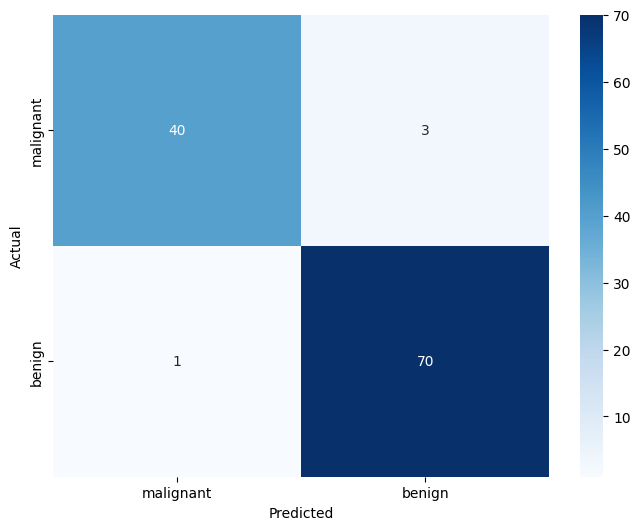

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### (Basic)Exercise 1
Provide an implementation of the basic algorithm on permutation feature importance.
*Note:*You will be graded on storage, copying, and handling of the random state.

Experimenting in how to make the function.

1. Compute baseline accuracy (so without shuffeling anything yet).
2. Take first column
3. Shuffle first column
4. compute accuracy 
5. save accuracy, maybe hashmap (column_name, accuracy, accuracy_diff)? Dictionary in python
6. repeat for all features
7. return the hashmap

In [26]:
from sklearn.metrics import accuracy_score
import random

metric = accuracy_score(y_test,y_pred) # Baseline accuracy from our random forst model made above.

def permutation_importance(model, X_test, y_test, metric):  
  len_array = len(X_train[0]) #Get len of the array
  base_acc = metric #Declare baseline accuracy
  myMap = {
    } # Create empty map with our base accuracy stored
    "Start":[base_acc,0,0]


  for i in range(0, len_array): #-1 because the first loop is our baseline without changeging the column order
    random.seed(4) #To Keep consistency in our shuffles
    
    # take column i of model
    shuffeled_list = X_train[:, i]
    # Shuffle the list
    random.shuffle(shuffeled_list)
    #put shuffeled list back into the array
    X_train[:, i] = shuffeled_list

    # train the model
    model.fit(X_train, y_train)
    # predict the model
    y_pred = model.predict(X_test)
    # Compute the accuracy in a variable
    newAcc = accuracy_score(y_test,y_pred)

    myMap[i] = [base_acc, newAcc, base_acc - newAcc] #Store the results as (column number: Baseline accuracy, New Accuracy, Difference (base - new))

  return myMap


permutation_importance(model= clf, X_test= X_test, y_test= y_test, metric=metric)

{'Start': [0.9649122807017544, 0, 0],
 0: [0.9649122807017544, 0.6666666666666666, 0.29824561403508776],
 1: [0.9649122807017544, 0.6754385964912281, 0.2894736842105263],
 2: [0.9649122807017544, 0.6403508771929824, 0.32456140350877194],
 3: [0.9649122807017544, 0.6228070175438597, 0.3421052631578947],
 4: [0.9649122807017544, 0.6140350877192983, 0.3508771929824561],
 5: [0.9649122807017544, 0.6578947368421053, 0.3070175438596491],
 6: [0.9649122807017544, 0.6491228070175439, 0.3157894736842105],
 7: [0.9649122807017544, 0.631578947368421, 0.33333333333333337],
 8: [0.9649122807017544, 0.631578947368421, 0.33333333333333337],
 9: [0.9649122807017544, 0.631578947368421, 0.33333333333333337],
 10: [0.9649122807017544, 0.6578947368421053, 0.3070175438596491],
 11: [0.9649122807017544, 0.6754385964912281, 0.2894736842105263],
 12: [0.9649122807017544, 0.6754385964912281, 0.2894736842105263],
 13: [0.9649122807017544, 0.6666666666666666, 0.29824561403508776],
 14: [0.9649122807017544, 0.666

# (Regular)Exercise 2:
In this exercise you will test and compare your implemntation. As a baseline we use the implemnattion from SKLEARN. Create tests to test your implementation thorougly. You will graded on aspects such as improving the computational feasibility, reducing the impact of randomization, efficient storage and retrivel of results, and creation of visulization.

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np
def permutation_importance(model, X_test, y_test, metric, random_state=None):

  # do something with baseline accuracy

  # Where will you store computed importance

  # Think about doing it for all features.
  # Think about shuffling parts of a column
  #  Compute accuracy after shuffling
  # Compute the difference from the baseline
  # Return the accuracy.

    # Ensure reproducability (random number generator)
    rng = np.random.default_rng(random_state)
    
    # Calculate the baseline metric (accuracy)
    y_pred = model.predict(X_test)
    baseline_accuracy = metric(y_test, y_pred)
    
    # Initialize an array to hold the importance
    importances = np.zeros(X_test.shape[1])
    
    # Permute each feature and calculate the new accuracy
    for i in range(X_test.shape[1]):
        # save original column
        saved_column = X_test[:, i].copy()
        
        # shuffle the column
        rng.shuffle(X_test[:, i])
        
        # Calculate new prediction
        new_predictions = model.predict(X_test)
        new_accuracy = metric(y_test, new_predictions)
        
        # Compute the importance
        importances[i] = baseline_accuracy - new_accuracy
        
        # Restore original data
        X_test[:, i] = saved_column
        
    return importances

# Use the feature importance function
feature_importances = permutation_importance(clf, X_test, y_test, accuracy_score, random_state=42)
print("Feature Importances:", feature_importances)
        
        
    

Feature Importances: [ 0.00877193  0.          0.00877193 -0.02631579 -0.02631579  0.
 -0.01754386 -0.00877193  0.00877193  0.          0.          0.03508772
 -0.00877193  0.          0.          0.01754386  0.00877193 -0.00877193
 -0.02631579 -0.00877193  0.         -0.00877193  0.00877193  0.01754386
 -0.00877193  0.00877193 -0.00877193 -0.01754386 -0.01754386  0.00877193]


Time elapsed for permutation importance calculation: 0.29 seconds
Time elapsed for Scikit-Learn permutation importance calculation: 2.63 seconds


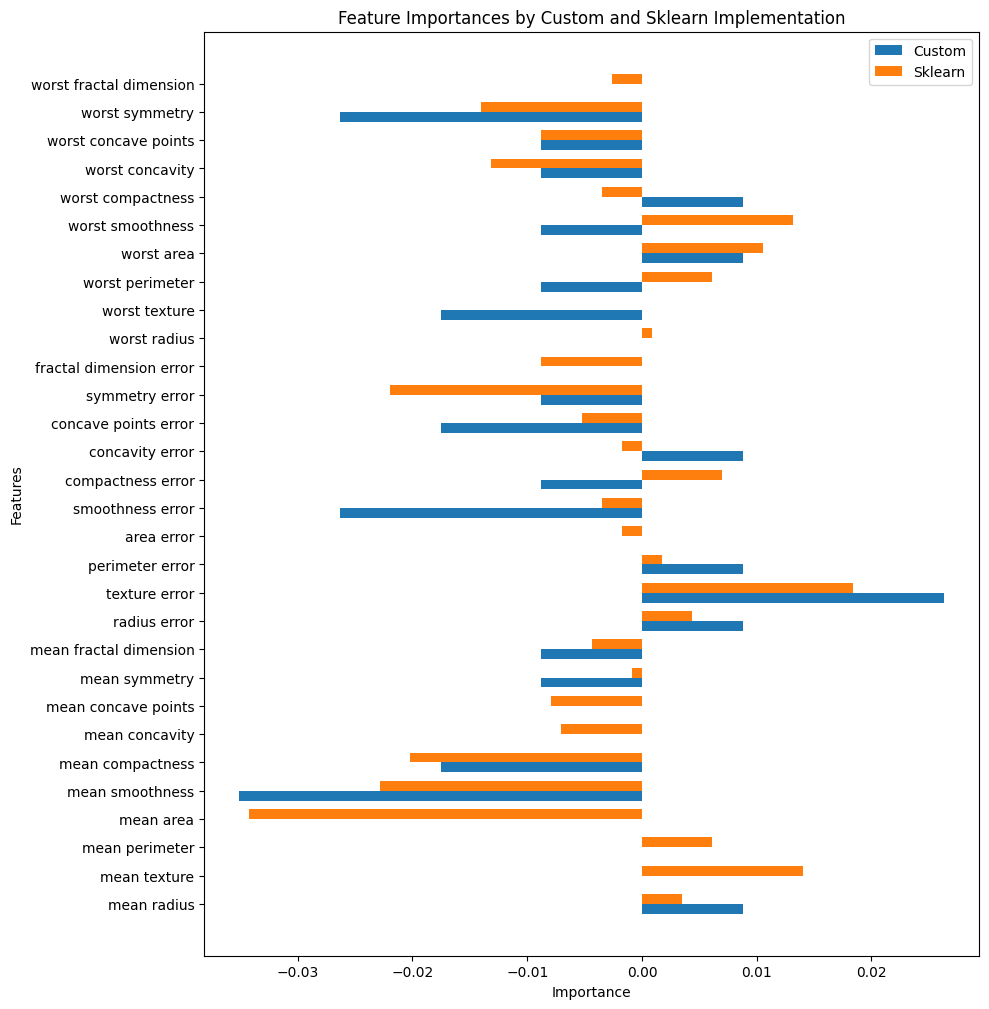

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance as sklearn_permutation_importance
import seaborn as sns

# Measuring performance of the custom implementation
start_time = time.time()
custom_importance = permutation_importance(clf, X_test, y_test, accuracy_score)
elapsed_time = time.time() - start_time

print("Time elapsed for permutation importance calculation: {:.2f} seconds".format(elapsed_time))

# Measuring performance of Skicit-Learn's implementationi
start_time_sklearn = time.time()
sklearn_results = sklearn_permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)
elapsed_time_sklearn = time.time() - start_time_sklearn
sklearn_importances = sklearn_results.importances_mean
print("Time elapsed for Scikit-Learn permutation importance calculation: {:.2f} seconds".format(elapsed_time_sklearn))

# Visualization
features = data.feature_names
fig, ax = plt.subplots(figsize=(10, 12))  
index = np.arange(len(features))


bar_width = 0.35  
rects1 = ax.barh(index - bar_width/2, custom_importance, bar_width, label='Custom')
rects2 = ax.barh(index + bar_width/2, sklearn_importances, bar_width, label='Sklearn')


ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importances by Custom and Sklearn Implementation')
ax.set_yticks(index)
ax.set_yticklabels(features)
ax.legend()

plt.show()


### How to interpret
**Zero Importance:** A feature with an importance close to zero has little to no impact on the model's predictive performance. In the context of permutation importance, this means that shuffling the feature values (randomizing them) doesn't really change the model's performance.

- **Follow-up Action:** Features with zero importance might not be necessary for the model. You could consider removing them in subsequent model training to simplify the model without sacrificing performance. However, it's essential to re-evaluate the model after removal to ensure no significant performance drop.

**Positive Importance:** This indicates that the feature has a positive effect on the model's predictive performance. Randomizing this feature's values (through permutation) worsens the model's performance.

- **Follow-up Action:** Features with positive importance are valuable to the model. They should be retained in the dataset. Further, understanding why these features are important can provide insights into the problem domain.

**Negative Importance:** A negative importance suggests that the random permutation of this feature actually improved the model's performance. This is counterintuitive and could indicate that the feature might be misleading the model when it's not permuted. However, it can also be due to noise or randomness, especially if the negative value is not significant.

- ** Follow-up Action:** It's essential to investigate features with negative importance. If consistent across multiple runs or models, consider whether the feature is correctly constructed or whether there might be data leakage. Depending on the analysis, you might choose to remove or modify such features.

**General Tips:**
- Before making decisions based solely on permutation importance, consider other methods of feature importance or selection to get a holistic view.
- Domain knowledge is invaluable. Feature importance s
hould be interpreted in the context of the problem domain. For instance, even if a feature has low importance, it might be kept for reasons of interpretability or domain significance.
- Always retrain and re-evaluate the model after making changes based on feature importance to ensure that the model's performance remains consistent or improves.

### (Advanced)Exercise 3
- Using the above guideline interpret the feature importance plot.
- What will be the impact of using different classifier? The question can be answered by running a comparative study for different classifier.

**Interpreting the plot**

Zero Importance
- Some features in both implementation indicate the score of importances that are close to zero. This mean that when these features are permuted, they will not have significant impact to the model performance.
- Example of these features include "worst radius" and "area error"
- Follow-up action: These features are good candidates to be removed to simplify the model. However, we need to retest the model performance to ensure that removing these feature will not decrese the predictive ability.

Positive Importance
- Features that indicate positive importance score are important. Permuting these features will decrease the accuracy of the model.
- example features: Texture error and radius error.
- Follow-up action: Since these features contributes positively to the model, they should be retained.

Negative Importance
- Some of the features are negative importance, that means that permuting them will improve the model performance.
- Example : Smoothness Error and symmetry error
- Follow up action : after reassessing and preprocessing (if needed), i
if they consistently show negative importance across various tests, it might be better to exclude them from the model.

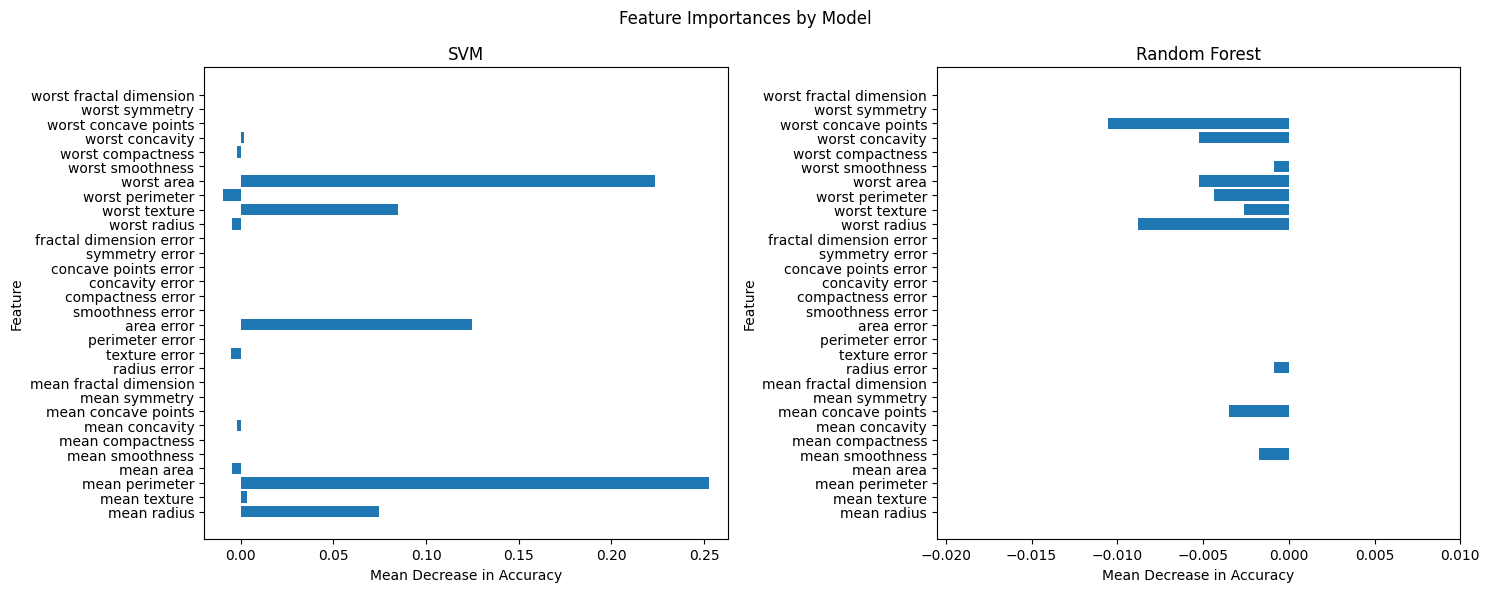

SVM Model Accuracy: 0.96
SVM Calculation Time: 0.15 seconds

Random Forest Model Accuracy: 0.96
Random Forest Calculation Time: 2.17 seconds



In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Load and prepare your data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# List of classifiers
classifiers = {
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Results storage
results = {}

# Experiment
for name, clf in classifiers.items():
    # Training
    clf.fit(X_train, y_train)
    # Predicting
    y_pred = clf.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Feature Importance
    start_time = time.time()
    perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
    importance_time = time.time() - start_time
    # Store results
    results[name] = {
        "accuracy": accuracy,
        "importances": perm_importance.importances_mean,
        "time": importance_time
    }

# Plotting feature importances
features = data.feature_names
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Feature Importances by Model')

for ax, (name, result) in zip(axes, results.items()):
    ax.barh(features, result['importances'])
    ax.set_title(f'{name}')
    ax.set_xlabel('Mean Decrease in Accuracy')
    ax.set_ylabel('Feature')
    ax.set_xlim([min(result['importances']) - 0.01, max(result['importances']) + 0.01])

plt.tight_layout()
plt.show()

# Printing model performance and timing
for name, result in results.items():
    print(f"{name} Model Accuracy: {result['accuracy']:.2f}")
    print(f"{name} Calculation Time: {result['time']:.2f} seconds\n")



Interpretation:

SVM shows several features with positive importance which indicates that these features are importance for model accuracy (e.g., worst area and worst texture). 

Unlike SVM, random forest model indicates negative importance for features it considers, which seems to be counterintuitive. Some scenario why this might happen:
- Model overfitting. When these features are permuted (and thus, their direct influence is diluted), the model may generalize better, oddly improving performance on the test set.
- Feature Interaction: Random Forest inherently handles feature interactions differently than SVM. Through multiple decision trees, might be interpreting these features' roles differently, possibly averaging out or masking the individual impacts seen in the SVM.

Use the insights from both SVM and Random Forest to balance out the sensitivity to features. Features that are important in SVM but show negative importance in Random Forest need careful examination and potentially different handling or preprocessing.

### (Advanced) Exercise 4
Create a dataset with 2 features and a target, such that the pdp of the first feature is flat, but its permutation importance is high. We will use a RandomForest for the model.

**Exercise credit**: https://www.kaggle.com/code/dansbecker/exercise-partial-plots

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set a random seed for reproducibility


# Generate synthetic data
n_samples = 1000
X1 =
X2 =

# Target with interaction: y is only affected by the interaction of X1 and X2
y =

# Create DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2']], data['y'], test_size=0.2, random_state=0)


SyntaxError: invalid syntax (4248630112.py, line 14)

In [ ]:
# Initialize and train RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


In [ ]:
# Plot Partial Dependence for Feature 1
fig, ax = plt.subplots(figsize=(8, 4))
plot_partial_dependence(model, X_train, features=[0], ax=ax)  # Feature index 0 for X1
plt.title("Partial Dependence of Feature 1")
plt.show()

# Calculate Permutation Importance for Feature 1
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
print("Permutation Importance of Feature 1:", result.importances_mean[0])


### Analyse the results obtained via the code given above.

### (Regular) Exercise 5
In this exercise we will evaluate the impact of feature engineeing on model predictions.
The exercise can be approach from different perspective. However, you can choose the following steps:


*   Choose a data set (see starter code below)
*   build the model
*  generate [ALE plots](https://github.com/blent-ai/ALEPython)
* Apply some feature engineering ( e.g. binning or normalization or any other).
* Build model again with engineerd features
* generate again ALE plots for engineered features
* analyse both graphs (think about magnitude of effect, shape, direction etc).

Starter code is given below:




#### Without normalization

In [36]:
# load required packages
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [37]:
# load datasets
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['progression'] = diabetes_data.target
# split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('progression', axis=1),
    df['progression'], test_size=0.2, random_state=42)

In [38]:
# Train the model [fee free to choose another one]
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
print(X_train[['bmi','age']])

          bmi       age
17   0.012117  0.070769
66  -0.018062 -0.009147
137  0.049840  0.005383
245 -0.035307 -0.027310
31  -0.065486 -0.023677
..        ...       ...
106 -0.076264 -0.096328
270  0.030440  0.005383
348 -0.020218  0.030811
435 -0.023451 -0.012780
102  0.028284 -0.092695

[353 rows x 2 columns]


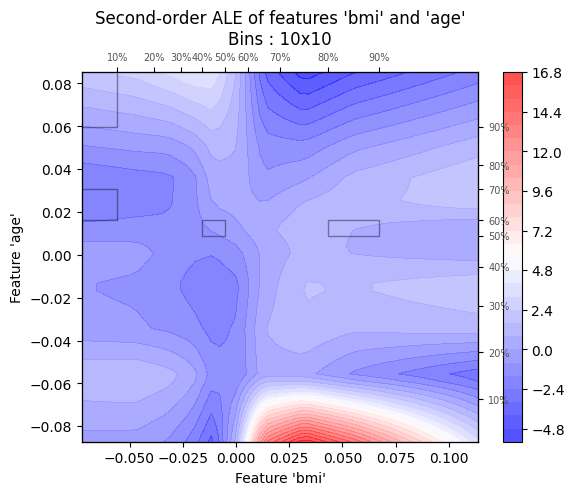

<Axes: title={'center': "Second-order ALE of features 'bmi' and 'age'\nBins : 10x10"}, xlabel="Feature 'bmi'", ylabel="Feature 'age'">

In [40]:
from alepython import ale_plot
ale_plot(model, X_train, ['bmi', 'age'], monte_carlo=True)

#### Applying Z Normalization

In [41]:
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['progression'] = diabetes_data.target

In [42]:
bmiMean = np.mean(df['bmi'])
bmiStdev = np.std(df['bmi'], ddof=1)

df["bmiZscore"]=  (df['bmi'] - bmiMean) / bmiStdev

In [43]:
ageMean = np.mean(df['age'])
ageStdev = np.std(df['age'], ddof=1)

df["ageZscore"]=  (df['age'] - ageMean) / ageStdev

In [44]:
df['progression'] = diabetes_data.target
# split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('progression', axis=1),
    df['progression'], test_size=0.2, random_state=42)


In [45]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
print(X_train[['bmiZscore','ageZscore']])

     bmiZscore  ageZscore
17    0.254454   1.486144
66   -0.379300  -0.192089
137   1.046646   0.113044
245  -0.741444  -0.573505
31   -1.375198  -0.497222
..         ...        ...
106  -1.601539  -2.022888
270   0.639233   0.113044
348  -0.424568   0.647027
435  -0.492470  -0.268372
102   0.593965  -1.946605

[353 rows x 2 columns]


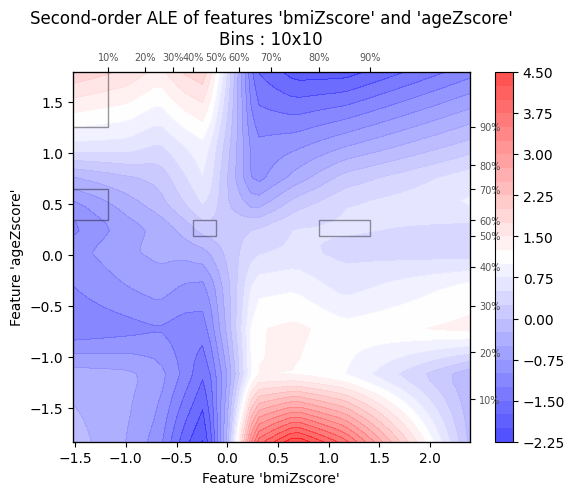

<Axes: title={'center': "Second-order ALE of features 'bmiZscore' and 'ageZscore'\nBins : 10x10"}, xlabel="Feature 'bmiZscore'", ylabel="Feature 'ageZscore'">

In [31]:
from alepython import ale_plot
ale_plot(model, X_train, ['bmiZscore', 'ageZscore'], monte_carlo=True)

### Dicusion of the Two ALE plots (Excersie 5)

- The two ALE plots shows that there is some increase in prediction with a negative age value and a BMI value between 0 to 0.100.
- Both plots also show that, if the age increases while the BMI stays the same, it will have a negative affect on the prediciton (see the change in area magnitude on ALE plot without Z socre between BMI 0.00 and 0.050 and Age area between 0.04 and 0.08 ). 
- As lasts, due to normalization, ALE values in the normalized plot ranges from -2.25 to 4.5 while in the normal ALE plot the values range from -4.8 to 16.8. So. the normalized ALE plot has a closer range of ALE values, reducing also any possible outliers from both features.

The difference between the two ALE plots is that the ALE plot with Z scores, has more flatten areas than the ALE plot without Z score.